

---


  

> # **군AI교육지원사업**
**자연어 처리**



---

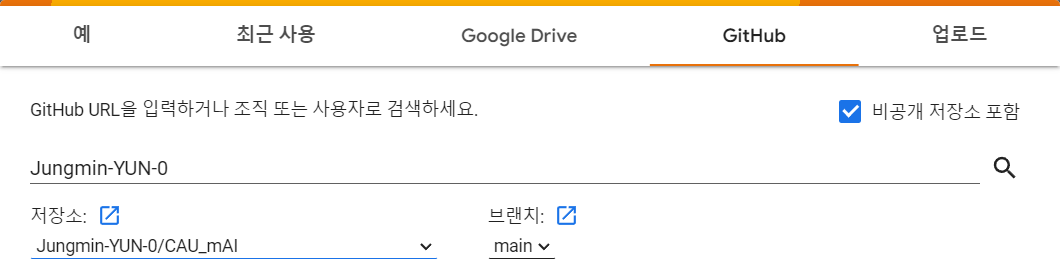

##WEEK 6
=========
### 1. Assignment (week3) 

### 2. RNN
>2-1. CharRNN
>
>2-2. Assignment (week6)
>
>2-3. Sentiment Analysis

## 1. Assignment(week3)

**[XOR 게이트]**

입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트

In [68]:
import torch
import torch.nn as nn

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [70]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device) 
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [71]:
"""
자유롭게 코드 구현
"""

'\n자유롭게 코드 구현\n'

In [72]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [73]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [74]:
for epoch in range(2000):
    optimizer.zero_grad()
    # forward 연산
    output = model(X)

    # 비용 함수
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, loss.item())

0 0.7402119636535645
100 0.6931473016738892
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996


In [75]:
# 예측값
predicted = (output>0.5).float()
accuracy = (predicted==Y).float().mean()
print('모델의 출력값(Hypothesis): ', output.detach().cpu().numpy())
print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
print('실제값(Y): ', Y.cpu().numpy())
print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


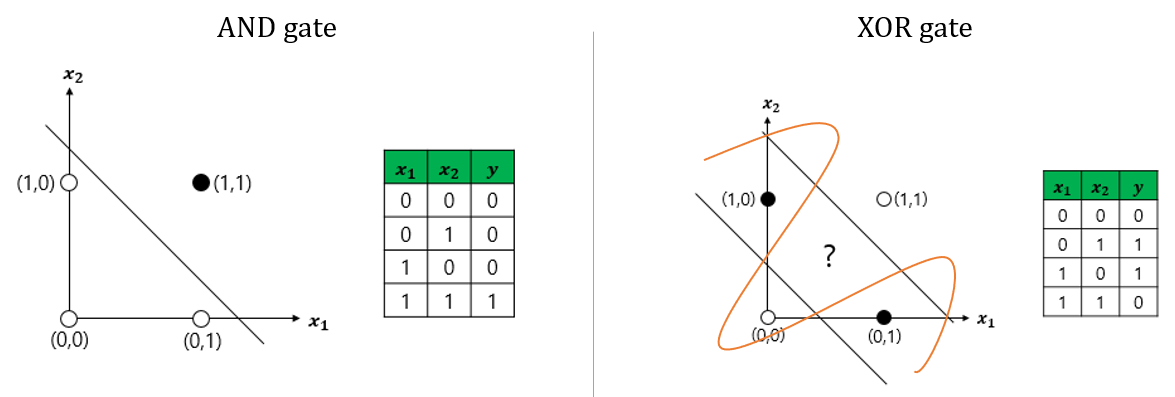

In [76]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

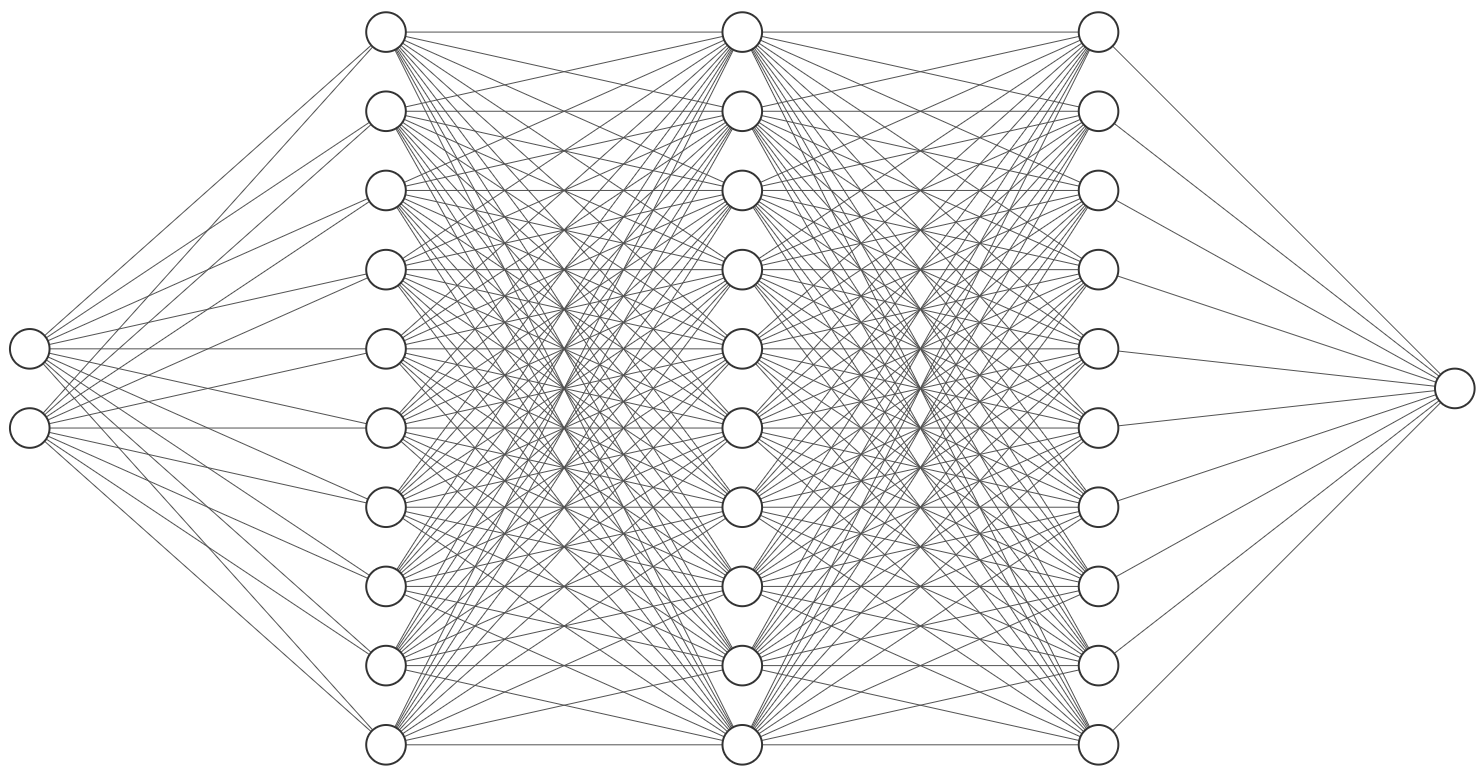

In [77]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for epoch in range(10000):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.6933898329734802
1000 0.693159818649292
2000 0.6931527853012085
3000 0.6931465864181519
4000 0.693139374256134
5000 0.6931283473968506
6000 0.6931062936782837
7000 0.6930419206619263
8000 0.6926092505455017
9000 0.010697245597839355


In [78]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[5.7421369e-04]
 [9.9926573e-01]
 [9.9929106e-01]
 [9.1232208e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## SkipGram

In [ ]:
## Skip-Gram 모델 정의

embedding_dim = 128
embedding_max_norm = 1   # Embedding Layer의 weight가 너무 커지지 않도록 제한

class SkipGram(nn.Module):
    def __init__(self, embedding_dim, vocab_size: int, context_size=4):
        super(SkipGram, self).__init__()
        ##############################################################
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)       # [48, 128] 48:vocabsize, 128:embedidng_size
        self.layer = nn.Linear(embedding_dim, vocab_size*context_size)  # [128, 192(=48*4)]

        self.context_size = context_size
        self.vocab_size = vocab_size        
        ##############################################################
    def forward(self, input):                                           # [1]
        ########################################################                   
        x = self.embeddings(input)                                      # [1, 128] (=[1x48]x[48x128])
        x = self.layer(x)                                               # [1, 192] ##(1,48)*4
        
        output = x.view(self.context_size, self.vocab_size)        # [4, 48] 

        output = F.softmax(output, dim=-1)
        
        ########################################################
        return output

<img src = "https://upload.wikimedia.org/wikipedia/commons/9/95/Skip-gram.png" height = 420 width = 360>

In [79]:
## using pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [80]:
class SkipGram(nn.Module) :
    def __init__(self, vocab_size, dim) :
        super(SkipGram, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim)  # [48, 128] 
        self.linear = nn.Linear(dim, vocab_size)  # [128, 48] 
    
    def forward(self, x) :
        embeddings = self.embedding(x)
        output = self.linear(embeddings)
        return output

In [81]:
example_sentence = "In the case of CBOW, one word is eliminated, and the word is predicted from surrounding words. Therefore, it takes multiple input vectors as inputs to the model and creates one output vector. In contrast, Skip-Gram learns by removing all words except one word and predicting the surrounding words in the context through one word.  So, it takes a vector as input and produces multiple output vectors. CBOW and Skip-Gram are different." 
example_data = example_sentence.split('. ')
example_data

['In the case of CBOW, one word is eliminated, and the word is predicted from surrounding words',
 'Therefore, it takes multiple input vectors as inputs to the model and creates one output vector',
 'In contrast, Skip-Gram learns by removing all words except one word and predicting the surrounding words in the context through one word',
 ' So, it takes a vector as input and produces multiple output vectors',
 'CBOW and Skip-Gram are different.']

In [82]:
# Tokenization (just split)
tokenized_sentence = []
for sentence in example_data:
  tokenized_sentence.append(sentence.split())

# Make Vocabulary
vocab = set([token for sentence in tokenized_sentence for token in sentence])    # 중복제거
#-----------------------------------------------------------------------
## Make Dictionary _ word2index{word: index}, index2word{index: word}

word2index = {word:index for index, word in enumerate(vocab)}
index2word = {index:word for index, word in enumerate(vocab)}
#-----------------------------------------------------------------------

In [83]:
class SkipGramDataset(Dataset) :
    def __init__(self, train_tokenized, vocab, window_size = 2) :
        self.x = []
        self.y = []
        
        for tokens in train_tokenized :
            token_ids = [vocab[token] for token in tokens]
            for i, id in enumerate(token_ids) :
                if i-window_size >= 0 and i+window_size < len(token_ids) :
                    self.y += (token_ids[i-window_size:i] + token_ids[i+1:i+window_size+1]) #y:context
                    self.x += [id] * 2 * window_size #x:center(* context개수)
        self.x = torch.LongTensor(self.x)
        self.y = torch.LongTensor(self.y)
    
    def __len__(self) :
        return self.x.shape[0]
        
    def __getitem__(self, idx) :
        return self.x[idx], self.y[idx]

In [84]:
skipgram_set = SkipGramDataset(tokenized_sentence, word2index)

batch_size = 4
loader = DataLoader(skipgram_set, batch_size = batch_size)

In [85]:
# ('case', ['In', 'the', 'of', 'CBOW,']
## ('case', 'In'),
## ('case', 'the'),
## ('case', 'of'),
## ('case', 'CBOW,')

In [86]:
model = SkipGram(vocab_size = len(word2index), dim = 256).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [87]:
learning_rate = 5e-4
num_epochs = 10
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.train()
model = model

for e in range(1, num_epochs + 1) :
    print(f"Epoch: {e}")
    for batch in loader:
        x, y = batch  #x:input(center), y:target(context)
        x, y = x.to(device), y.to(device)
        output = model(x)
        
        optimizer.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
    
    print(f"Train loss per epoch: {loss.item()}")
print('Finished')

Epoch: 1
Train loss per epoch: 3.9590229988098145
Epoch: 2
Train loss per epoch: 3.9101462364196777
Epoch: 3
Train loss per epoch: 3.862823009490967
Epoch: 4
Train loss per epoch: 3.8170218467712402
Epoch: 5
Train loss per epoch: 3.7727091312408447
Epoch: 6
Train loss per epoch: 3.7298507690429688
Epoch: 7
Train loss per epoch: 3.6884093284606934
Epoch: 8
Train loss per epoch: 3.6483473777770996
Epoch: 9
Train loss per epoch: 3.6096251010894775
Epoch: 10
Train loss per epoch: 3.572201728820801
Finished


## 2. RNN

### 2.1 CharRNN

**[CharRNN]**

Character-level RNN

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

1. Data Preprocessing

In [89]:
# apple

input_str = 'appl'    # input
label_str = 'pple'    # output

char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)

print(f'vocab: {char_vocab}')
print(f'size of vocab: {vocab_size}')

vocab: ['a', 'e', 'l', 'p']
size of vocab: 4


In [90]:
input_size = vocab_size
hidden_size = 4
output_size = 4
learning_rate = 0.1

In [91]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab))
print(char_to_index)

{'a': 0, 'e': 1, 'l': 2, 'p': 3}


In [92]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: 'a', 1: 'e', 2: 'l', 3: 'p'}


In [93]:
x_data = [[char_to_index[c] for c in input_str]]
y_data = [[char_to_index[c] for c in label_str]]
print(x_data)
print(y_data)

[[0, 3, 3, 2]]
[[3, 3, 2, 1]]


In [94]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])]


In [95]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [96]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 4, 4])
레이블의 크기 : torch.Size([1, 4])


2. Model

In [97]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [98]:
net = Net(input_size, hidden_size, output_size)

In [99]:
outputs = net(X)
print(outputs.shape)

torch.Size([1, 4, 4])


3. Train

In [100]:
optimizer = optim.Adam(net.parameters(), learning_rate)
criterion = torch.nn.CrossEntropyLoss()

In [101]:
for i in range(10):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward() 
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.2506449222564697 prediction:  [[3 3 3 3]] true Y:  [[3, 3, 2, 1]] prediction str:  pppp
1 loss:  1.0772243738174438 prediction:  [[3 3 3 3]] true Y:  [[3, 3, 2, 1]] prediction str:  pppp
2 loss:  0.9446086883544922 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
3 loss:  0.8141912221908569 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
4 loss:  0.6584793329238892 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
5 loss:  0.5070984959602356 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
6 loss:  0.3807547688484192 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
7 loss:  0.2571500539779663 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
8 loss:  0.1740497201681137 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple
9 loss:  0.11926925182342529 prediction:  [[3 3 2 1]] true Y:  [[3, 3, 2, 1]] prediction str:  pple


### 2-2. Assignment(week6)

**[before]** charcater-level RNN

appl → pple

**[Assigment]** word-level RNN

Repeat is the best medicine for → is the best medicine for memory

- Hint: one-hot vector 대신 embedding 사용


In [102]:
import torch
import torch.nn as nn
import torch.optim as optim

In [103]:
sentence = "Repeat is the best medicine for memory".split()

In [121]:
"""
자유롭게 코드 구현 (필요한 요소들 힌트)
- vocab
- word2index
- index2word
- 'Repeat is the best medicine for'과 'is the best medicine for memory'를 정수로 인코딩 필요
- 모델 구현(embedding 사용)
- ...
"""

[01/201] 2.0698 
Repeat the best the the medicine is

[41/201] 1.4302 
Repeat is the best medicine for memory

[81/201] 0.7768 
Repeat is the best medicine for memory

[121/201] 0.3776 
Repeat is the best medicine for memory

[161/201] 0.2048 
Repeat is the best medicine for memory

[201/201] 0.1265 
Repeat is the best medicine for memory



### 2-3. Sentiment Analysis

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
#import torchtext.legacy as torchtext
from torchtext.legacy import data, datasets
import random

In [2]:
BATCH_SIZE = 64
lr = 0.001
EPOCHS = 10

In [3]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", DEVICE)

cpu와 cuda 중 다음 기기로 학습함: cuda


1. Data Preprocessing

torchtext

In [4]:
TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.Field(sequential=False, batch_first=True)

In [5]:
trainset, testset = datasets.IMDB.splits(TEXT, LABEL)

In [6]:
print(vars(trainset[0]))

{'text': ['this', 'obscure', 'de', 'sica', 'delivers', 'the', 'goods.', 'and', 'it', 'is', 'said', '"the', 'meek', 'shall', 'inherit', 'the', 'earth."', 'this', 'tale', 'of', 'classes', 'on', 'the', 'surface', 'but', 'really', 'an', 'allegory', 'for', 'all', 'the', 'homeless', 'people', 'that', 'populated', 'europe', 'after', 'the', 'great', 'war.', 'they', 'are', 'homeless', 'but', 'cheerful,', 'in', 'a', 'societies', 'too', 'impoverished', 'and', 'selfish', 'to', 'care', 'for', 'or', 'acknowledge', 'them,', 'footmats', 'for', 'the', 'italian', 'carpetbaggers.', 'de', 'sica', 'chooses', 'to', 'tell', 'it', 'as', 'a', 'fairy', 'tale,', 'a', 'cinderella', 'story.', 'i', 'have', 'not', 'read', 'the', 'book', 'it', 'is', 'based', 'on', 'so', 'i', 'cannot', 'foresay', 'if', 'the', 'deus', 'ex', 'machina', 'is', 'the', 'construct', 'of', 'the', 'writer', 'or', 'vittorio.', 'it', 'begins', 'with', 'the', 'words,', '"once', 'upon', 'a', 'time..."', 'to', 'exemplify', 'the', 'timelessness', 'o

vocab

In [7]:
TEXT.build_vocab(trainset, min_freq=5)
LABEL.build_vocab(trainset)

In [8]:
vocab_size = len(TEXT.vocab)
n_classes = 2
print('단어 집합의 크기 : {}'.format(vocab_size))
print('클래스의 개수 : {}'.format(n_classes))

단어 집합의 크기 : 46159
클래스의 개수 : 2


In [9]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7fd5324c8250>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'that': 11, 'it': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'are': 22, 'not': 23, 'film': 24, 'you': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'all': 35, 'who': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'her': 42, 'about': 43, "it's": 44, 'some': 45, 'if': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'she': 53, 'would': 54, 'even': 55, 'good': 56, 'my': 57, 'only': 58, 'their': 59, 'no': 60, 'really': 61, 'had': 62, 'which': 63, 'can': 64, 'up': 65, 'were': 66, 'see': 67, 'than': 68, 'we': 69, '-': 70, 'been': 71, 'into': 72, 'get': 73, 'will': 74, 'story': 75, 'much': 76, 'because': 77, 'most': 78, 'how': 7

dataloader

In [11]:
trainset, valset = trainset.split(split_ratio=0.8)

In [12]:
train_iter, val_iter, test_iter = data.BucketIterator.splits(
        (trainset, valset, testset), batch_size=BATCH_SIZE,
        shuffle=True, repeat=False)

2. Model

In [15]:
class GRU(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes):
        super(GRU, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x)
        h_0 = self._init_state(batch_size=x.size(0))  # 첫번째 hidden state를 0으로 초기화
        x, _ = self.gru(x, h_0)  #[batch_size, sequence_length, hidden_dim]

        h_t = x[:,-1,:]  #[batch_size, hidden_sim]
        # 즉, 전체 hidden state에 대한 정보가 포함되어 있어서, 이때 마지막 time-step의 hidden state만 가져옴

        logit = self.out(h_t)   #[batch_size, output_dim(=num_class)]
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

3. Train

In [63]:
model = GRU(1, 256, vocab_size, 128, n_classes).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCEWithLogitsLoss().to(DEVICE)

In [19]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data.sub_(1)  # -1
        optimizer.zero_grad()

        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

def evaluate(model, val_iter):
    model.eval()
    corrects, total_loss = 0, 0
    for batch in val_iter:
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data.sub_(1)
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction='sum')
        total_loss += loss.item()
        corrects += (logit.max(1)[1].data == y.data).sum()
    size = len(val_iter.dataset)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy

In [20]:
for e in range(1, EPOCHS+1):
    train(model, optimizer, train_iter)
    val_loss, val_accuracy = evaluate(model, val_iter)

    print("[Epoch: %d] val loss : %5.2f | val accuracy : %5.2f" % (e, val_loss, val_accuracy))

[Epoch: 1] val loss :  0.70 | val accuracy : 50.06
[Epoch: 2] val loss :  0.72 | val accuracy : 50.16
[Epoch: 3] val loss :  0.66 | val accuracy : 61.00
[Epoch: 4] val loss :  0.58 | val accuracy : 68.14
[Epoch: 5] val loss :  0.38 | val accuracy : 83.18
[Epoch: 6] val loss :  0.42 | val accuracy : 81.32
[Epoch: 7] val loss :  0.35 | val accuracy : 85.10
[Epoch: 8] val loss :  0.37 | val accuracy : 85.74
[Epoch: 9] val loss :  0.41 | val accuracy : 85.10
[Epoch: 10] val loss :  0.46 | val accuracy : 85.06


In [21]:
test_loss, test_acc = evaluate(model, test_iter)
print('test_loss: %5.2f | test_acc: %5.2f' % (test_loss, test_acc))

test_loss:  0.45 | test_acc: 83.62
